In [1]:
#  Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Load dataset
df = pd.read_csv("house_prices1.csv")


In [3]:
# Using top correlated features from Week 4
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'LotArea']
target = 'SalePrice'

X = df[features]
y = df[target]

In [4]:
#2️⃣ Train/Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}\n")

Training samples: 244
Testing samples: 62



In [5]:
# -------------------------------
# 3️⃣ Train Linear Regression Model
# -------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
## 4️⃣ Make Predictions
# -------------------------------
y_pred = model.predict(X_test)



In [ ]:
# 5️⃣ Evaluate Model Performance
# -------------------------------
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
print("=== Model Evaluation ===")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}\n")

=== Model Evaluation ===
Mean Absolute Error (MAE): 16135.17
Root Mean Squared Error (RMSE): 17519.90



In [ ]:
# 6️⃣ Compare Actual vs Predicted
# -------------------------------
comparison = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
}).head(10)

print("=== Sample Predictions ===")
print(comparison, "\n")

=== Sample Predictions ===
   Actual      Predicted
0  275000  283724.211121
1  185000  203418.676838
2  205000  224131.801417
3  180000  191013.196650
4  330000  357030.401774
5  350000  378524.773363
6  260000  248483.869151
7  200000  190010.314231
8  370000  360068.935941
9  210000  227071.802512 



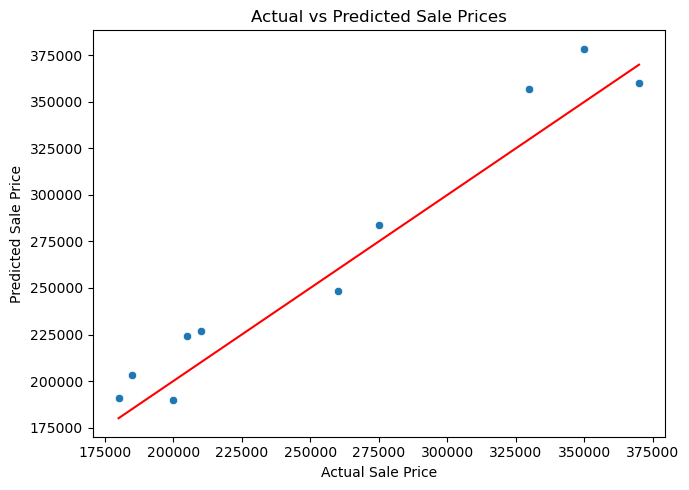

In [ ]:
# 7️⃣ Visualize Predictions
# -------------------------------
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.tight_layout()
plt.show()


In [ ]:
# 8️⃣ Feature Importance (Coefficients)
# -------------------------------
importance = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("=== Feature Importance (Model Coefficients) ===")
print(importance, "\n")

=== Feature Importance (Model Coefficients) ===
       Feature  Coefficient
2   GarageCars  5263.318044
0  OverallQual   597.577408
4    YearBuilt   589.024266
1    GrLivArea    83.815923
3  TotalBsmtSF    80.677718
5      LotArea     2.006473 

